In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
raw_data = pd.read_csv('INFY.NS.csv')
raw_data = raw_data.dropna()
raw_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-10,102.542999,110.746002,94.339798,107.478996,3.551731,30230400.0
1,2000-01-11,103.125000,107.811996,98.880898,98.880898,3.267598,15658368.0
2,2000-01-12,93.359398,104.289001,91.921898,102.167999,3.376225,25993472.0
3,2000-01-13,102.344002,102.726997,93.994904,94.457802,3.121434,20038400.0
4,2000-01-14,95.695297,96.070297,87.523399,95.128098,3.143584,16040064.0
...,...,...,...,...,...,...,...
5190,2020-09-30,1009.000000,1023.950012,1005.000000,1008.250000,1008.250000,8048817.0
5191,2020-10-01,1020.599976,1026.500000,1011.750000,1017.650024,1017.650024,5563358.0
5192,2020-10-05,1018.049988,1054.900024,1018.049988,1048.699951,1048.699951,14212509.0
5193,2020-10-06,1055.000000,1060.000000,1031.349976,1055.750000,1055.750000,9090819.0


In [5]:
n_seq = 10
new_data = pd.DataFrame()
for i in range(n_seq):
    var_name = 'Shifted Close Price ' + str(i)
    new_data[var_name] = raw_data['Close'].shift(-i)
#     raw_data['Shifted Close Price 2'] = raw_data['Close Price'].shift(-2)
#     raw_data['Shifted Close Price 3'] = raw_data['Close Price'].shift(-3)
#     raw_data['Shifted Close Price 4'] = raw_data['Close Price'].shift(-4)
#     raw_data['Shifted Close Price 5'] = raw_data['Close Price'].shift(-5)
new_data = new_data.dropna()
new_data

,Shifted Close Price 0,Shifted Close Price 1,Shifted Close Price 2,Shifted Close Price 3,Shifted Close Price 4,Shifted Close Price 5,Shifted Close Price 6,Shifted Close Price 7,Shifted Close Price 8,Shifted Close Price 9
0,107.478996,98.880898,102.167999,94.457802,95.128098,92.741402,93.247299,100.702003,99.586304,104.845001
1,98.880898,102.167999,94.457802,95.128098,92.741402,93.247299,100.702003,99.586304,104.845001,108.428001
2,102.167999,94.457802,95.128098,92.741402,93.247299,100.702003,99.586304,104.845001,108.428001,110.230003
3,94.457802,95.128098,92.741402,93.247299,100.702003,99.586304,104.845001,108.428001,110.230003,115.480003
4,95.128098,92.741402,93.247299,100.702003,99.586304,104.845001,108.428001,110.230003,115.480003,118.930000
...,...,...,...,...,...,...,...,...,...,...
5181,1011.000000,1002.150024,1009.900024,1007.500000,1019.750000,975.400024,1011.450012,1010.400024,1009.000000,1008.250000
5182,1002.150024,1009.900024,1007.500000,1019.750000,975.400024,1011.450012,1010.400024,1009.000000,1008.250000,1017.650024
5183,1009.900024,1007.500000,1019.750000,975.400024,1011.450012,1010.400024,1009.000000,1008.250000,1017.650024,1048.699951
5184,1007.500000,1019.750000,975.400024,1011.450012,1010.400024,1009.000000,1008.250000,1017.650024,1048.699951,1055.750000


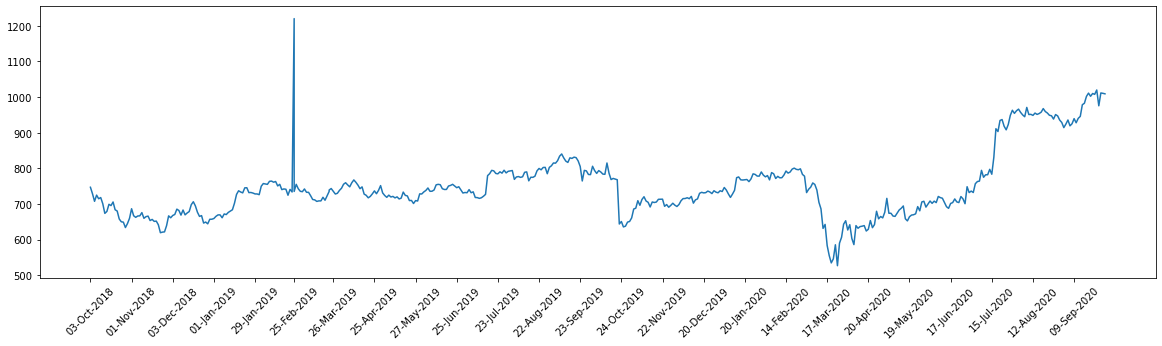

In [207]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,5))
ax1.plot(raw_data['Date'], raw_data['Prev Close'])
ax1.set_xticks(raw_data['Date'][::20])
ax1.set_xticklabels(raw_data['Date'][::20], rotation=45)
plt.show()

In [242]:
training_columns = ['Prev Close','Average Price','Total Traded Quantity', 
                    'Shifted Close Price 1', 'Shifted Close Price 2', 'Shifted Close Price 3',
                    'Shifted Close Price 4', 'Shifted Close Price 5']
training_set = raw_data[training_columns].values
print(training_set.shape)

(491, 8)


In [243]:
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler(feature_range = (0, 1))
training_set_x_scaled = sc_x.fit_transform(training_set[:,:3])
sc_y = MinMaxScaler(feature_range = (0, 1))
training_set_y_scaled = sc_y.fit_transform(training_set[:,3:])
print(training_set_x_scaled.shape, training_set_y_scaled.shape)

(491, 3) (491, 5)


In [264]:
X_train = []
y_train = []
for i in range(5, int(len(training_set_scaled)*0.75)):
    X_train.append(training_set_x_scaled[i-5:i, :])
    y_train.append(training_set_y_scaled[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 3))
# print(X_train.shape, y_train.shape)

(367, 5, 3) (367, 5)


In [265]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [292]:
def forecast_lstm(model, x, n_batch):
    x = x.reshape(1, 1, len(x))
    forecast = model.predict(x, batch_size=n_batch)
    return [x for x in forecast[0, :]]

def make_forecast(model, n_batch, train, test, n_lag, n_seq):
    forecasts = list()
    for i in range(len(test)):
        x,y = test[i, 0:n_lag], test[i, n_lag:]
        forecast = forecast_lstm(model, x , n_batch)
        forecasts.append(forecast)
    return forecasts

In [ ]:
n_neurons = 50
model = Sequential()
model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X_train.shape[1], X_train.shape[2]),
               return_sequences=True, activation='relu', recurrent_activation='hard_sigmoid'))
model.add(LSTM(n_neurons, return_sequences=True, activation='relu', 
               recurrent_activation='hard_sigmoid'))
model.add(LSTM(n_neurons, activation='relu', recurrent_activation='hard_sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')

for i in range(100):
    model.fit(X_train, y_train, epochs=1, batch_size=n_batch, verbose=1, shuffle=False)
    model.reset_states()

285/367 [======================>.......] - ETA: 0s - loss: 0.0034

In [286]:
X_test = []
y_test = []
for i in range(int(len(training_set_x_scaled)*0.75), len(training_set_x_scaled)):
    X_test.append(training_set_x_scaled[i-5:i, :])
    y_test.append(training_set_y_scaled[i, :])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 3))

(123, 5, 3) (123, 5)


In [287]:
y_pred = regressor.predict(X_test)

In [288]:
predicted_stock_price = sc_y.inverse_transform(y_pred)
print(predicted_stock_price.shape)

(123, 5)


In [289]:
actual_stock_price = sc_y.inverse_transform(y_test)
actual_stock_price.shape

(123, 5)

367


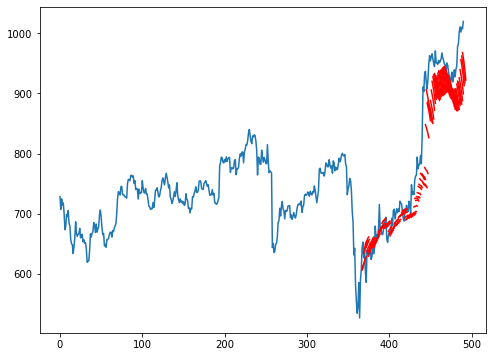

In [312]:
plt.plot(raw_data['Close Price'].values)
print(len(X_train))
for i in range(len(predicted_stock_price)):
    off_s = len(X_train) + i
    off_e = off_s + len(predicted_stock_price[i])
    xaxis = [x for x in range(off_s, off_e)]
    yaxis = predicted_stock_price[i]
    plt.plot(xaxis, yaxis, color='red')
plt.show()

In [311]:
print(len(X_train), raw_data['Close Price'].values[len(X_train)], predicted_stock_price[0])

367 643.0 [605.98004 613.13544 616.4458  621.5923  625.75696]
